In [2]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the data from the CSV files
annual_production_df = pd.read_csv("annual/annual_production_quang_binh.csv")
annual_area_df = pd.read_csv("annual/annual_area_quang_binh.csv")
annual_yield_df = pd.read_csv("annual/annual_yield_quang_binh.csv")

winter_spring_production_df = pd.read_csv("winter_spring/winter_spring_production_quang_binh.csv")
winter_spring_area_df = pd.read_csv("winter_spring/winter_spring_area_quang_binh.csv")

summer_autumn_and_autumn_winter_production_df = pd.read_csv("summer_autumn_and_autumn_winter/summer_autumn_and_autumn_winter_production_quang_binh.csv")
summer_autumn_and_autumn_winter_area_df = pd.read_csv("summer_autumn_and_autumn_winter/summer_autumn_and_autumn_winter_area_quang_binh.csv")

In [4]:
def beautify_dataframe(df: pd.DataFrame, period: str = "annual", value: str = "production") -> pd.DataFrame:
    # Delete the first column of the dataframes
    df.drop(df.columns[0], axis=1, inplace=True)

    # Change the DataFrame into long-table format
    df = df.transpose()
    
    # Set index column name
    df.index.name = "year"

    # Change the column names of the DataFrame
    column_names = period + "_" + value
    df.columns = [column_names]
    
    return df

In [5]:
annual_production_df = beautify_dataframe(annual_production_df, "annual", "production")
annual_area_df = beautify_dataframe(annual_area_df, "annual", "area")
annual_yield_df = beautify_dataframe(annual_yield_df, "annual", "yield")

# winter_spring_production_df = beautify_dataframe(winter_spring_production_df, "winter_spring", "production")
# winter_spring_area_df = beautify_dataframe(winter_spring_area_df, "winter_spring", "area")

# summer_autumn_and_autumn_winter_production_df = beautify_dataframe(summer_autumn_and_autumn_winter_production_df, "summer_autumn_and_autumn_winter", "production")
# summer_autumn_and_autumn_winter_area_df = beautify_dataframe(summer_autumn_and_autumn_winter_area_df, "summer_autumn_and_autumn_winter", "area")

In [6]:
# Merge the dataframes
# production_df = pd.concat([annual_production_df, winter_spring_production_df, summer_autumn_and_autumn_winter_production_df], axis = 1)
# area_df = pd.concat([annual_area_df, winter_spring_area_df, summer_autumn_and_autumn_winter_area_df], axis = 1)

In [7]:
annual_yield_df.to_excel("yield_quang_binh_2000_2020.xlsx")

In [8]:
# # Export data to .xlsx files
# production_df.to_excel("production_quang_binh.xlsx")
# area_df.to_excel("area_quang_binh.xlsx")

/var/folders/yf/bvb_cdgn46s4l8cp8l3wd_nc0000gn/T/ipykernel_97376/419127619.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_line.set_xticklabels(annual_production_df.index, rotation = 45)


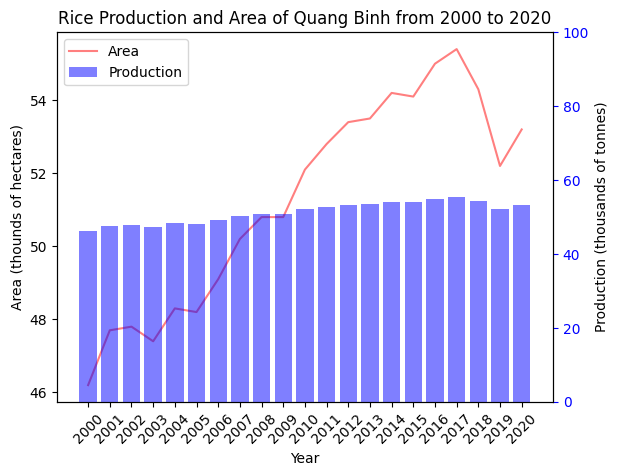

<Figure size 640x480 with 0 Axes>

In [9]:
# Create a figure and axis
fig, ax_line = plt.subplots()

# Plot the line graph
ax_line.plot(annual_area_df.index, annual_area_df["annual_area"], color = "red", label = "Area", alpha = 0.5)
ax_line.set_xlabel("Year")
ax_line.set_ylabel("Area (thounds of hectares)")
ax_line.tick_params(direction = 'out', colors = 'black', grid_color = 'white', grid_alpha = 0.2)

# Create a second y-axis for the bar graph
ax_bar = ax_line.twinx()
ax_bar.bar(annual_production_df.index, annual_production_df["annual_production"], color = "blue", label = "Production", alpha = 0.5)
ax_bar.set_ylabel("Production (thousands of tonnes)")
ax_bar.tick_params(direction = 'out', colors = 'blue', grid_color = 'white', grid_alpha = 0.2)

# Set y-axis limit for the bar chart
ax_bar.set_ylim(0, 100)

# Rotate x-axis labels
ax_line.set_xticklabels(annual_production_df.index, rotation = 45)

# Add legend
lines, lines_labels = ax_line.get_legend_handles_labels()
bars, bars_labels = ax_bar.get_legend_handles_labels()
ax_bar.legend(lines + bars, lines_labels + bars_labels, loc = "upper left")

# Show plot
plt.title("Rice Production and Area of Quang Binh from 2000 to 2020")
# plt.tight_layout()
plt.show()
plt.clf()

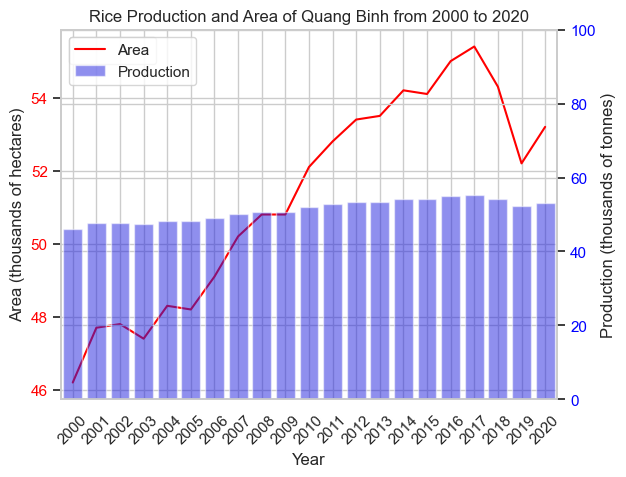

<Figure size 640x480 with 0 Axes>

In [10]:
# Set the style for Seaborn
sns.set(style = "whitegrid")

# Create a figure and axis
fig, ax_line = plt.subplots()

# Plot the line graph
sns.lineplot(data = annual_area_df, x = annual_area_df.index, y = "annual_area", ax = ax_line, color = "red", label = "Area")
ax_line.set_xlabel("Year")
ax_line.set_ylabel("Area (thousands of hectares)")
ax_line.tick_params(axis = "y", labelcolor = "red")

# Create a second y-axis for the bar graph
ax_bar = ax_line.twinx()
sns.barplot(data=annual_production_df, x = annual_production_df.index, y = "annual_production", ax = ax_bar, color = "blue", alpha = 0.5, label = "Production")
ax_bar.set_ylabel("Production (thousands of tonnes)")
ax_bar.tick_params(axis = "y", labelcolor = "blue")

# Set y-axis limit for the bar chart
ax_bar.set_ylim(0, 100)

# Rotate x-axis labels
ax_line.set_xticklabels(annual_production_df.index, rotation = 45)

# Add legend
lines, lines_labels = ax_line.get_legend_handles_labels()
bars, bars_labels = ax_bar.get_legend_handles_labels()
ax_bar.legend(lines + bars, lines_labels + bars_labels, loc = "upper left")

# Set plot title
plt.title("Rice Production and Area of Quang Binh from 2000 to 2020")

# Show plot
plt.show()
plt.clf()